# Lab 2
Lucas Street, 1874989

In [11]:
%%capture
import sys
!{sys.executable} -m pip install --user scipy numpy matplotlib pandas

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

import numpy as np
import pandas as pd
from scipy import stats

## Problem 1
Let us assume the average number of cosmic background rays seen per day from a telescope is 4.5, and the average number of gamma rays per day emitted by a hypothetical source is 6.

In [12]:
avg_daily_cosmic_rays = 4.5
avg_daily_gamma_rays = 6

Let us also assume the cosmic background is Poisson-distributed; we can plot its probability mass function (PMF).

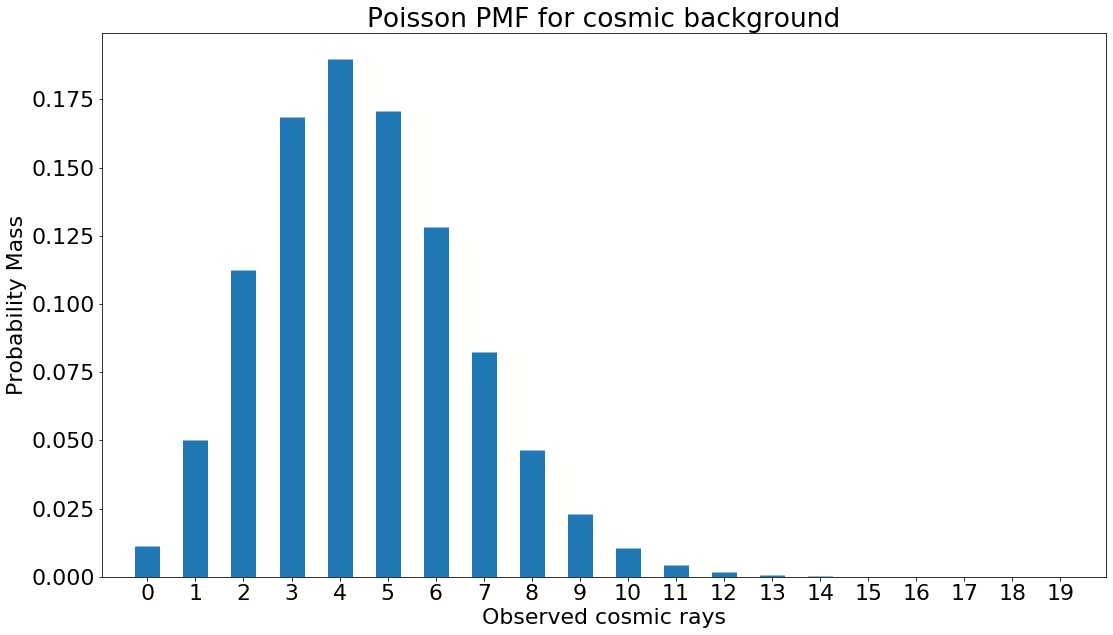

In [13]:
dist = stats.poisson(avg_daily_cosmic_rays)

x = np.arange(0, 20)
pmf = dist.pmf(x)
plt.title("Poisson PMF for cosmic background")
plt.xlabel("Observed cosmic rays")
plt.ylabel("Probability Mass")
plt.vlines(x, 0, pmf, linewidth=25, color="C0")
plt.xticks(x)
plt.ylim(0, None);

To show how this distribution changes as we integrate for several days, we will plot the distribution corresopnding to the expected number of cosmic rays seen after $n$ days.

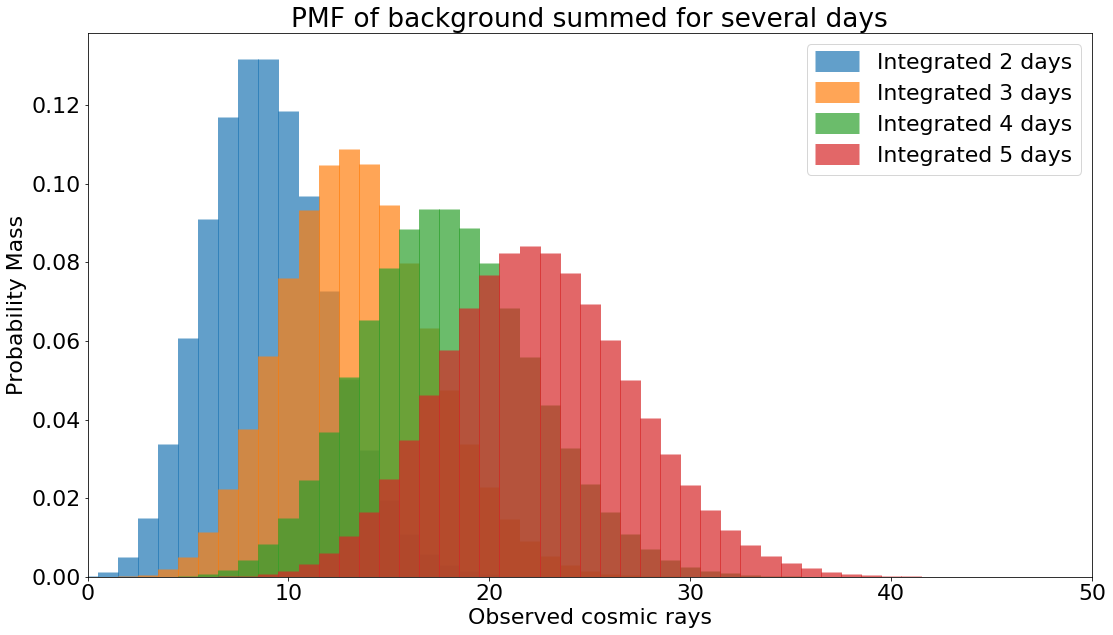

In [14]:
plt.title("PMF of background summed for several days")
plt.xlabel("Observed cosmic rays")
plt.ylabel("Probability Mass")
x = np.arange(0, 50)
for i in range(2, 6):
    plt.vlines(x, 0, stats.poisson.pmf(x, avg_daily_cosmic_rays * i), linewidth=21, color=f"C{i - 2}", alpha=0.7)
plt.xlim(0, 50)
plt.ylim(0, None)
plt.legend([f"Integrated {i} days" for i in range(2, 6)]);

Even after waiting several days, the distribution seems to retain the Poisson shape of the PMF. This makes sense mathematically: the Poisson distribution is defined as $P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$ for mean value $\lambda$, and lambda simply increases as the number of days $n$ increases, leaving the form of the distribution the same.

Conceptually, the above plot also makes sense: the probability of observing a certain number of cosmic rays per day doesn't change, but because we wait more days, the probability of observing $n$ times the average cosmic rays per day increases.

What if we _average_ the number of cosmic rays observed per day? For this, we convolve the distribution with itself $n$ times given $n$ additional days.

In [15]:
def plot_convolved(pmf, n, *args, **kwargs):
    for i in range(n):
        pmf = np.convolve(pmf, pmf)
    plt.title("PMF convolved over several days")
    plt.xlabel("Average observed cosmic rays")
    plt.ylabel("Probability Mass")
    x = np.arange(0, 20)
    plt.vlines(np.linspace(0, 19, len(pmf)), 0, pmf, *args, **kwargs)
    plt.xticks(x)
    plt.ylim(0, None)

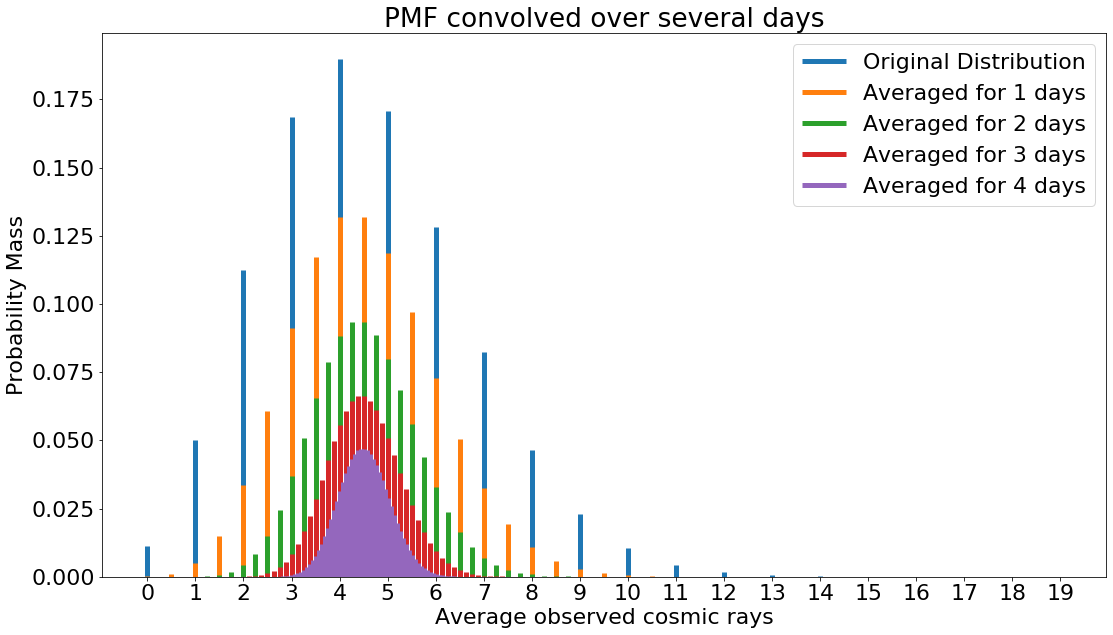

In [16]:
for i in np.arange(5):
    plot_convolved(pmf, i, linewidth=5, color=f"C{i}")
plt.legend(['Original Distribution', *[f"Averaged for {n} days" for n in range(1, 5)]]);

For larger $n$, the distribution shrinks and converges around its mean, into what looks like a Gaussian PDF. The shrinking makes sense, since the more we average, the more possible values there are for observing cosmic rays, and the probability masses are distributed out to each value accordingly.

What happens if we pick an even larger value of $n$, like 10 days?

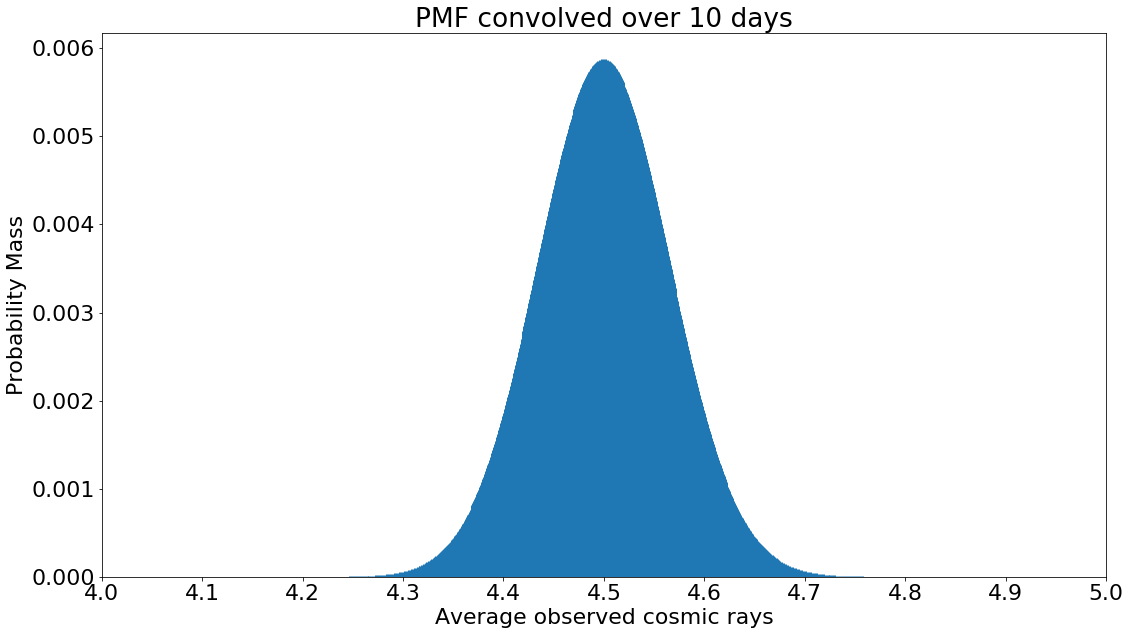

In [17]:
plot_convolved(pmf, 10, linewidth=1, color='C0')
plt.title("PMF convolved over 10 days")
plt.xlim(4, 5)
plt.xticks(np.linspace(4, 5, 11));

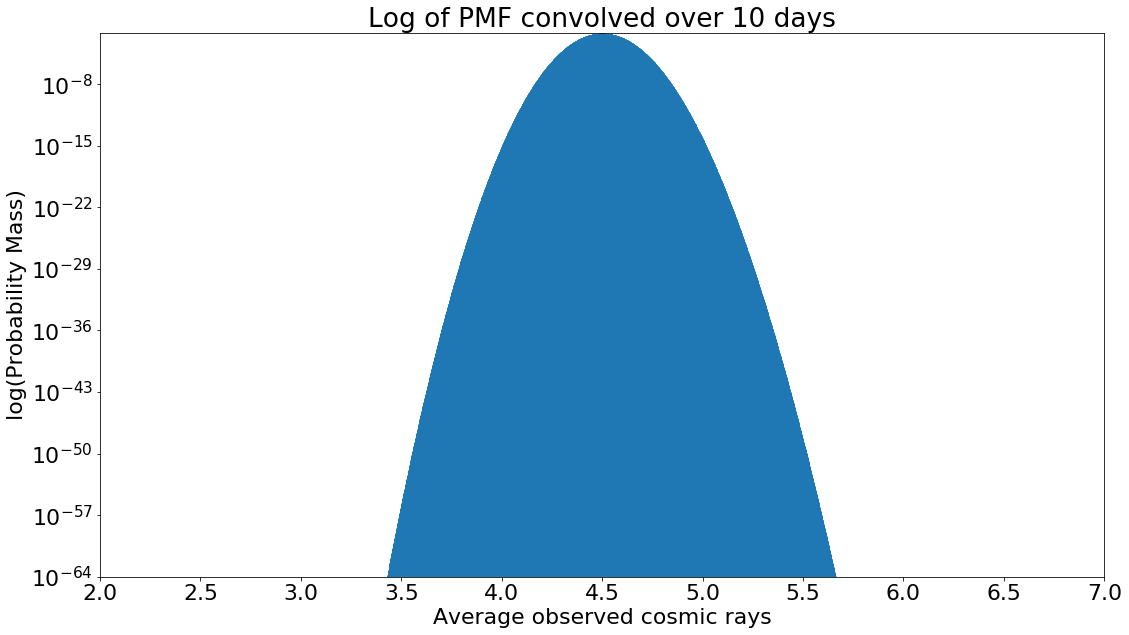

In [18]:
plot_convolved(pmf, 10, linewidth=1, color='C0')
plt.title("Log of PMF convolved over 10 days")
plt.xlim(2, 7)
plt.xticks(np.linspace(2, 7, 11));
plt.ylabel("log(Probability Mass)")
plt.yscale('log')
plt.ylim(1e-64, None);

Now it is much more Gaussian-shaped than Poisson-shaped. The central limit theorem says that for some distributions, repeated convolution like we did above will eventually cause the distribution to converge to a Gaussian distribution. Note that this did not happen when we simply integrated the background distribution over several days - the act of convolving the distribution with itself is key to achieving this averaging behavior.

Let's choose to wait 2 days, and say we observe what appears to be 12 gamma rays (2 days * 6 gamma rays/day). What is the 'sigma' of this observation? That is, what is the probability that my cosmic ray background data gave me something that _looked_ like 12 gamma rays instead? The probability that we saw 12 cosmic rays in 2 days is the value of the PMF at 12 after waiting an additional day:

In [19]:
prob = stats.poisson(2 * avg_daily_cosmic_rays).pmf(12)
print(prob)

0.0727650466416229


About 7%. Let's convert this to the form $X\sigma$ using the `ppf` function of the standard normal distribution.

In [20]:
stats.norm.ppf(prob)

-1.4555028807681023

Therefore, the probability is $1.46\sigma$.

## Problem 2

Let's assume we have a new kind of measurement where our background has a skewed continuous distribution, like the Rayleigh distribution: $P(x) = \frac{x}{\sigma^2} e^{\frac{-x^2}{2\sigma^2}}$, where $\sigma$ is called the scale parameter. Let's set $\sigma = 1$ and plot the PDF of the distribution.

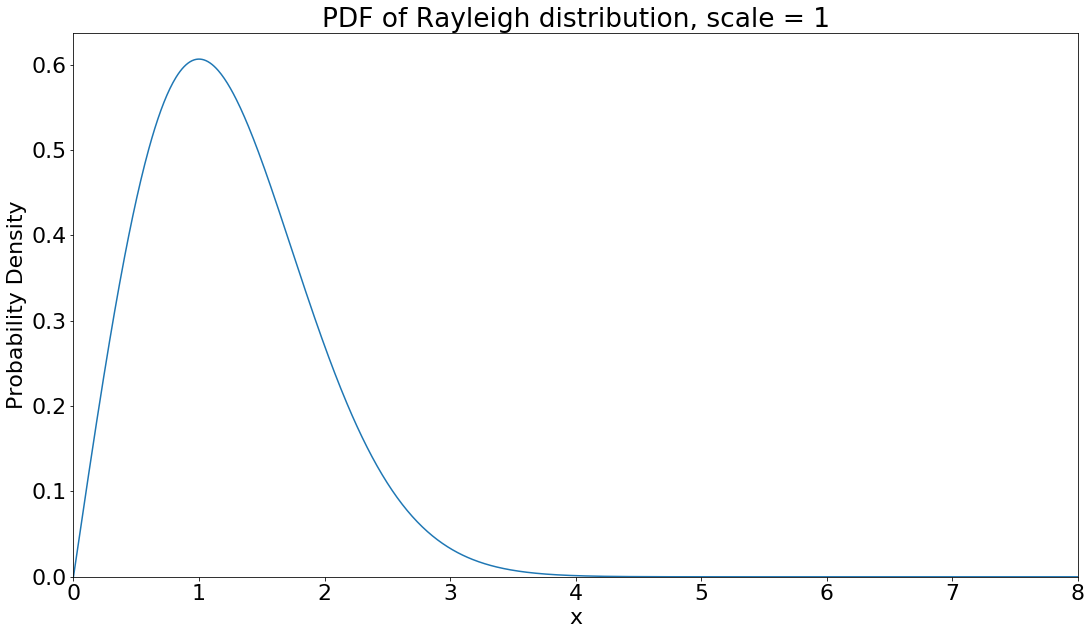

In [45]:
dist = stats.rayleigh(scale=1)
x = np.linspace(0, 8, 1000)
plt.title("PDF of Rayleigh distribution, scale = 1")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.plot(x, dist.pdf(x))
plt.xlim(0, 8)
plt.xticks(range(0, 9))
plt.ylim(0, None);

Now let's average over more observing intervals by convolving the distribution with itself, just as we did before with the Poisson distribution.

In [48]:
def plot_convolved_pdf(pdf, n, *args, **kwargs):
    for i in range(n):
        pdf = np.convolve(pdf, pdf)
    plt.title("PDF convolved over several intervals")
    plt.xlabel("Average x")
    plt.ylabel("Probability Density")
    plt.semilogy(np.linspace(0, 8, len(pdf)), pdf, *args, **kwargs)
#     plt.ylim(0, None)

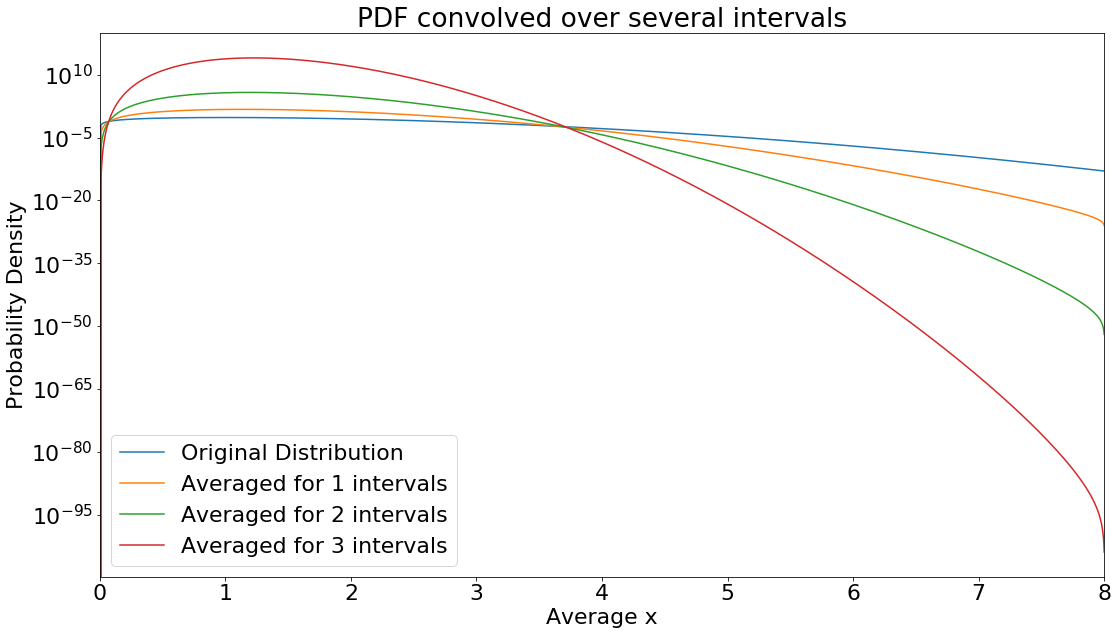

In [50]:
pdf = dist.pdf(x)
for i in np.arange(4):
    plot_convolved_pdf(pdf, i, color=f"C{i}")
plt.xlim(0, 8)
plt.legend(['Original Distribution', *[f"Averaged for {n} intervals" for n in range(1, 4)]]);